# Passenger Relations with Flight Network Properties
## 1. Get the Flight Network Properties

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import powerlaw
import matplotlib.pyplot as plt


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


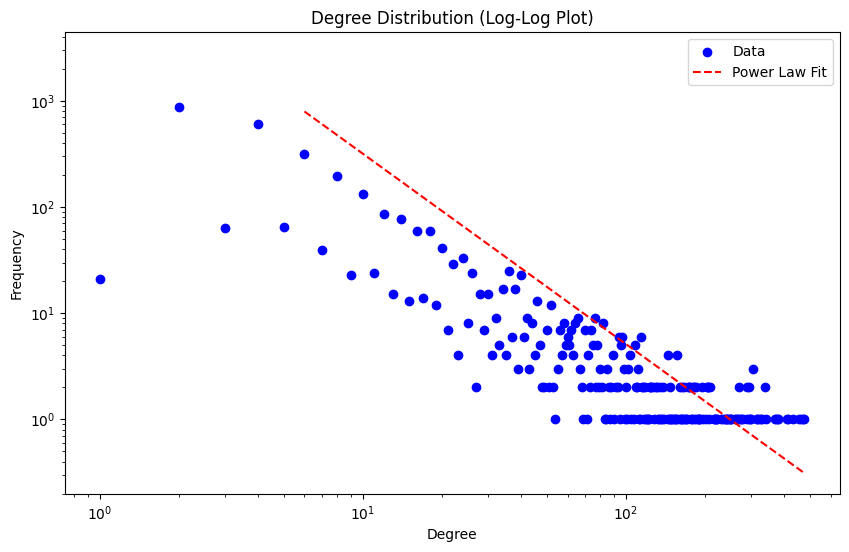

In [2]:

# Load and parse the airports data
airports_columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database timezone', 'Type', 'Source']
airports_df = pd.read_csv(r'C:\Users\warre\OneDrive\桌面\nus_phy\PC5253\Final\Flight-network\airports.dat', header=None, names=airports_columns, na_values='\\N')

# Load and parse the routes data
routes_columns = ['Airline', 'Airline ID', 'Source airport', 'Source airport ID', 'Destination airport', 'Destination airport ID', 'Codeshare', 'Stops', 'Equipment']
routes_df = pd.read_csv(r'C:\Users\warre\OneDrive\桌面\nus_phy\PC5253\Final\Flight-network\routes.dat', header=None, names=routes_columns, na_values='\\N')

# Initialize a directed graph
G = nx.DiGraph()

# Add airports as nodes
for index, row in airports_df.iterrows():
    if pd.notnull(row['IATA']):  # Only add airports with a valid IATA code
        G.add_node(row['IATA'], **row.to_dict())

# Add routes as edges
for index, row in routes_df.iterrows():
    if pd.notnull(row['Source airport']) and pd.notnull(row['Destination airport']):
        G.add_edge(row['Source airport'], row['Destination airport'])




# Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Fit the power-law model to the degree_sequence
fit = powerlaw.Fit(np.array(degree_sequence), discrete=True)
gamma = fit.power_law.alpha
x_min = fit.power_law.xmin
R, p = fit.distribution_compare('power_law', 'exponential')

# Calculate theoretical frequencies based on the fitted model
# We create a sequence of degrees from x_min to the maximum degree observed
degree_values = np.arange(x_min, max(degree_sequence)+1)
theoretical_frequencies = powerlaw.Power_Law(xmin=x_min, parameters=[gamma]).pdf(degree_values)

# Actual degree frequencies
unique_degrees, actual_counts = np.unique(degree_sequence, return_counts=True)

# Plotting Degree Distribution (Scatter Plot) with Power Law Fit
plt.figure(figsize=(10, 6))
plt.scatter(unique_degrees, actual_counts, color='blue', label='Data')
plt.plot(degree_values, theoretical_frequencies * len(degree_sequence) / sum(theoretical_frequencies), color='red', linestyle='--', label='Power Law Fit')
plt.title("Degree Distribution (Log-Log Plot)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
# Find the largest connected component (undirected, giant component)
largest_cc = max(nx.connected_components(G.to_undirected()), key=len)
giant_component_size = len(largest_cc)
print(f"Largest Connected Component Size: {giant_component_size}")

In [ ]:
# Find the largest strongly connected component (directed,giant component)
largest_scc = max(nx.strongly_connected_components(G), key=len)
giant_component_size_scc = len(largest_scc)
print(f"Largest Strongly Connected Component Size: {giant_component_size_scc}")

In [ ]:
# Largest Weakly Connected Component (directed,giant component)
largest_wcc = max(nx.weakly_connected_components(G), key=len)  # Nodes in LWCC
giant_component_size_wcc = len(largest_wcc)  # Size of LWCC
print(f"Largest Weakly Connected Component Size: {giant_component_size_wcc}")

In [1]:
# Clustering Coefficient, Transitivity (for undirected version of G)
clustering_coefficient = nx.average_clustering(G.to_undirected())
transitivity = nx.transitivity(G.to_undirected())
print(f"Clustering Coefficient: {clustering_coefficient}, Transitivity: {transitivity}")

NameError: name 'nx' is not defined

In [ ]:
# Centrality Measures 
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
pagerank = nx.pagerank(G)